# 10. Data Science z Python 3.10. Klasyfikacja zdjęć z fast.ai v1 & Jupyter Notebook
## 🇬🇧 Data Science with Python 3.10. Classification of images using fast.ai V1 & Jupyter Notebook
#### 👨‍🏫 PhD Wojciech Oronowicz-Jaśkowiak

### 1. Import bibliotek
#### 🇬🇧 Import libraries
W tym miejscu importujemy biblioteki, które będą nam potrzebne do wytrenowania sieci neuronowej. Jeżeli w tym miejscu widoczny będzie błąd, to konieczne jest zainstalowanie biblioteki w danym środowisku. W takim wypadku wchodzimy w terminal, aktywujemy środowisko pracy, instalujemy biblioteki (pip install X).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install fastbook

In [ ]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Mozemy pracować na najnowszej wersji fastai (2.7.13) albo na starszej (np. 1.0.61). Starsza wersja fastai generuje obecnie mniejszą liczbę problemów w Google Colab.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ZUM/ZUM')

In [ ]:
path = Path('dataset_x1')

### 2. Przygotowanie danych do analizy

In [ ]:
data = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed= 42),
    get_y = parent_label,
    item_tfms= Resize(128)
)
# parent_label - bierze label z nazwy folderu
# Określenie klas danych

In [ ]:
data = data.new(
    item_tfms = RandomResizedCrop(128, min_scale = 0.5),
    batch_tfms = aug_transforms(max_rotate=8.0, max_zoom=15.5, pad_mode='zeros', p_affine=0.95))

dls = data.dataloaders(path, bs = 20, num_workers =1 ) #na mac 1 na win 0
# weryfikacja danych

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [ ]:
verify_images(path.ls())
# losowe przdzielenie zdjęć z określonych katalogów do klas, wybór propocji danych treningowych i testowych
# tfms odpowiada za modyfikowanie danych, korzystamy z https://docs.fast.ai/vision.data.html
# https://fastai1.fast.ai/vision.transform.html
# wartości domyślne dla get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Optional[Collection[Transform]]=None) → Collection[Transform]

(#2) [Path('dataset_x1/dog'),Path('dataset_x1/cat')]

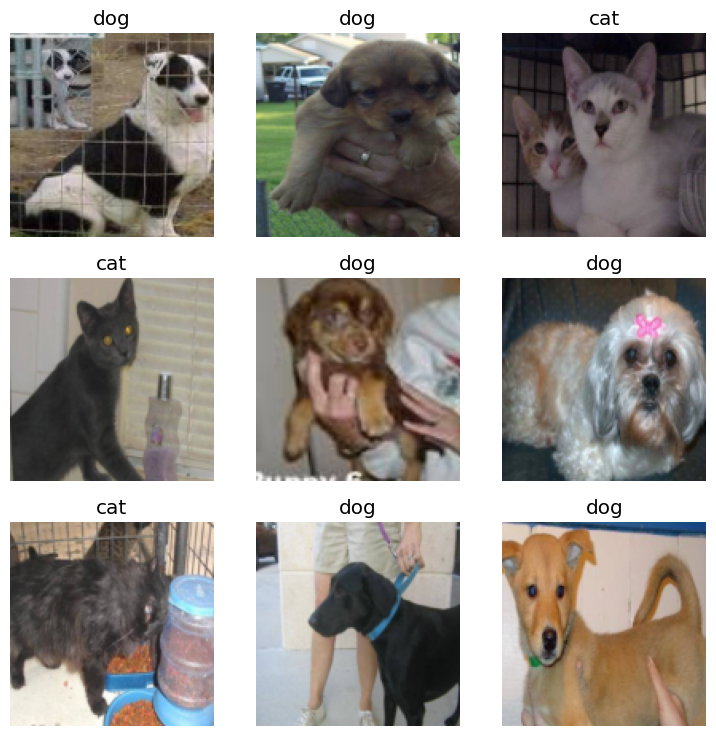

In [ ]:
dls.valid.show_batch()
# pokazuje 9 losowo wybranych zdjęć z przypisaną do nich kategorią

In [ ]:

# pokazuje informcję o liczbie klas oraz o liczbie materiałów przeznaczonych do treningu oraz do testu

### 3. Trenowanie modelu

In [ ]:

# resnet18, resnet34, resnet50, resnet101, resnet152, squeezenet1_0, squeezenet1_1, densenet121, densenet169,
# densenet201, densenet161, vgg16_bn, vgg19_bn, alexnet

learn = vision_learner(dls, alexnet, metrics = accuracy)

# batch size

# 2 epoki przy one cycle policy

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 105MB/s]


In [ ]:
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.351559,0.942426,0.725806,00:30
1,1.185127,0.556173,0.806452,00:07
2,1.041376,0.586461,0.774194,00:04
3,1.068408,0.530186,0.758065,00:05
4,1.024316,0.430438,0.822581,00:07


In [ ]:

# validation loss dla ostatniej epoki

In [ ]:

# generuje wykres, ktory przedstawia epoki z train/validation loss

In [ ]:

# przegląd modelu

In [ ]:

# przegląd warstw modelu

### 4. Eksport modelu

In [ ]:
learn.export(fname='model.pkl')
# eksport

### 5. Confusion matrix

In [ ]:
# nie ma przetreneowania bo vall loss ciągle maleje,
# tworzenie confusion matrix

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


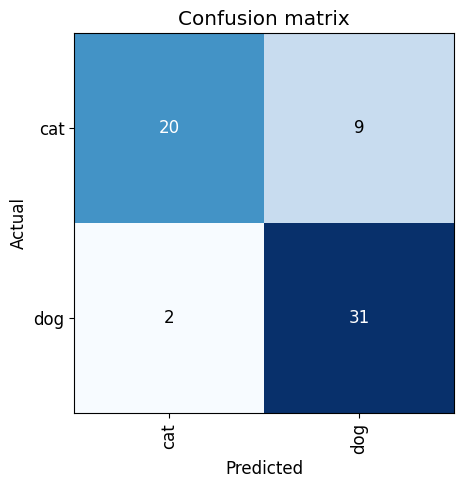

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [ ]:

# najczęstsze błędy

### 6. Wykorzystanie modelu w praktyce
#### 🇬🇧 Predictions

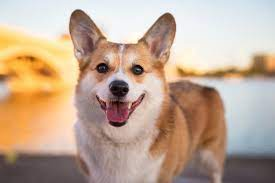

In [ ]:
# Przygotowanie do predykcji
new_image_path = Path('/content/sample_data/Corgi.jpeg')

# Załadowanie obrazu
img = PILImage.create(new_image_path)

img

In [ ]:
prediction, _, _ = learn.predict(img)

In [ ]:
prediction

'dog'

## 📚 Zadanie
#### Przeprowadź dwa nowe eksperymenty:
##### a. wytrenuj nowy model wprowadzając wybrane przez Ciebie modyfikacje do augmentacji danych, zwiększ liczbę epok do 5, porównaj wyniki z modelem oryginalnym;
##### b. wytrenuj nowy model wprowadzając zmiany w zakresie: zmiany rozdzielczości danych do 300 px., zmiany techniki wypełniania „brakujących pikseli” (tj. padding) na „zeros”; zmniejszeniu wartości batch size o 5; zmniejszeniu ilości danych walidacyjnych do 15%, zmiany liczby epok do 5, porównaj wyniki z modelem oryginalnym.
#### Opisz trzy wytrenowane przez siebie modele, udziel odpowiedzi na poniższe pytania:
##### a. Czy modele cechują się, Twoim zdaniem, dostateczną dokładnością klasyfikacji?
##### b. Czy jeden z modeli jest bardziej podatny na popełnienie błędu I/II rodzaju?
##### c. Jak przebiegał proces uczenia się modeli? (po której epoce widoczna jest stabilizacja validation loss? czy obserwujesz objawy overfittingu – jeżeli tak, to w której epoce?)


## Zadanie a


In [ ]:
data = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed= 22),
    get_y = parent_label,
    item_tfms= Resize(128)
)

In [ ]:
data = data.new(
    item_tfms = RandomResizedCrop(128, min_scale = 0.5),
    batch_tfms = aug_transforms(max_rotate=8.0, max_zoom=15.5, pad_mode='zeros', p_affine=0.95, flip_vert=True, max_lighting=0.4)
)# dodałam max_lighting=0.4 i flip_vert=True

dls = data.dataloaders(path, bs = 20, num_workers =1 ) #na mac 1 na win 0

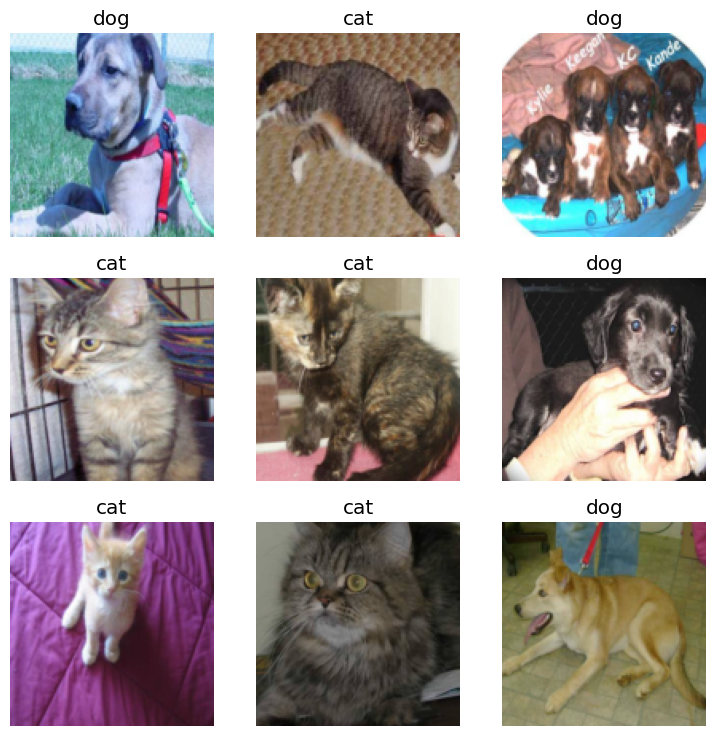

In [ ]:
dls.valid.show_batch()

In [ ]:
learn = vision_learner(dls, alexnet, metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.577029,2.285593,0.629032,00:06
1,1.370824,1.354799,0.612903,00:04
2,1.259762,0.381114,0.870968,00:05
3,1.211363,0.910917,0.758065,00:06
4,1.195875,0.395744,0.838710,00:04


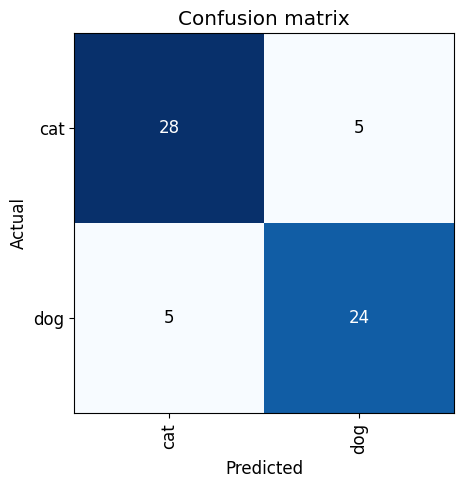

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Po modyfikacjach wyniki modelu wyglądają bardzo podobnie, accuracy w pierwszym modelu wyniosło około 82% wdrugim około 83%. Confusion matrix wygląda lepiej w modelu z modyfikacjami. Mamy tu po 5 przypadku zaklasyfikowania klasy kot jako pies i odwrotnie. Natomiast w przypadku pierwszego modelu miałam 9 przypadków klasy kot zaklasyfikowanych jako pies i 2 klsy pies zaklasyfikowanych jako kot.


## Zadanie b.


In [ ]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.15, seed=42),  # Zmniejszenie ilości danych walidacyjnych do 15%
    get_y=parent_label,
    item_tfms=Resize(300)
)

In [ ]:
data = data.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5),  # zmiana rozdzielczości danych do 300 px
    batch_tfms=aug_transforms(max_rotate=8.0, max_zoom=15.5, pad_mode='border')  # W zadaniu jest 'zmiany techniki wypełniania „brakujących pikseli” (tj. padding) na „zeros”' ale używaliśmy tego wcześniej dlatego zdecydowałam się zmienić na border
)

dls = data.dataloaders(path, bs=15, num_workers=1) # zmniejszenie wartości batch size o 5


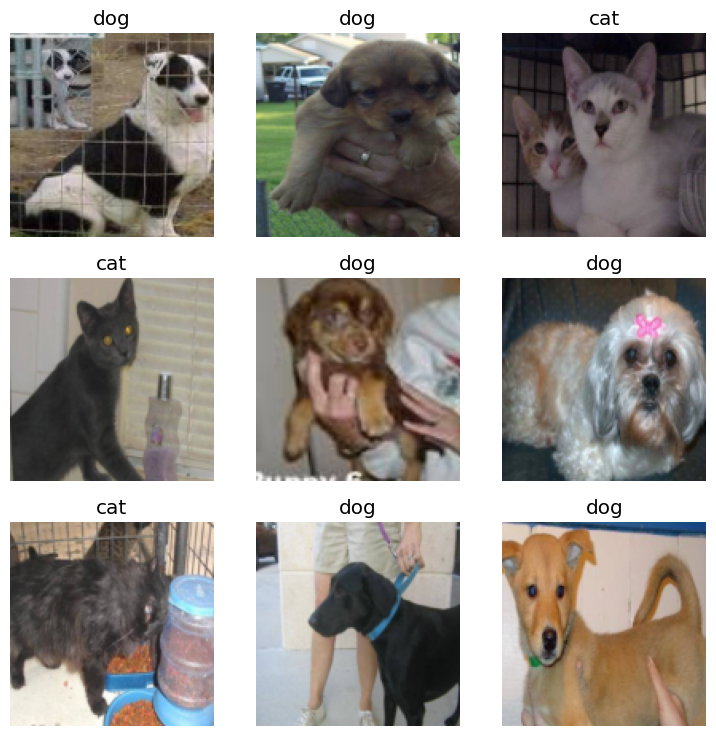

In [ ]:
dls.valid.show_batch()

In [ ]:
learn = vision_learner(dls, alexnet, metrics = accuracy)

In [ ]:
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.176974,0.786229,0.695652,00:04
1,1.070665,0.494430,0.804348,00:05
2,0.987273,0.453994,0.804348,00:07
3,0.969530,0.300168,0.891304,00:05
4,0.946635,0.731299,0.782609,00:04


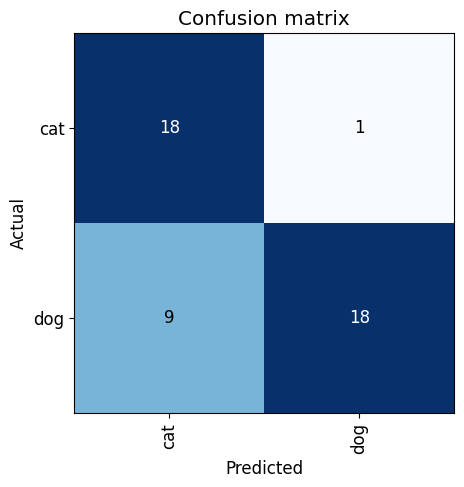

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Trzeci model osiągnął niższą dokładność w porównaniu z poprzednimi modelami - 78% vs 82-83%. Mamy też aż 9 przypadków psa błędnie zaklasyfikowanego jako kot.

##Zadanie 2.

## Model 1.

- Dokładność modelu wynosi około 82%
- Model wydaje się być bardziej podatny na popełnianie błędów I rodzaju (klasyfikacja "cat" jako "dog")
- Validation loss stabilizuje się po około 2-3 epokach. Nie wydaje się być objawów overfittingu


## Model 2.

- Dokładność modelu wynosi około 83%
- Model wydaje się być bardziej równoważony niż model pierwszy
- Validation loss stabilizuje się po 2-3 epokach, ale może występować overfitting

## Modle 3.

- Dokładność modelu wynosi około 78%
- Model wydaje się być bardziej podatny na błędy II rodzaju (klasyfikacja "dog" jako "cat")
- Istnieją objawy overfittingu, szczególnie zwiększenie loss na zbiorze walidacyjnym w ostatniej epoce